### Student Information
Name: Yvonne Chow Lork Yee

Student ID: 106065710

GitHub ID: YvonneLYee

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

# Import library and Load data

In [1]:
### Begin Assignment Here!
# import library
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# my functions
import helpers.data_mining_helpers as dmh

# prepare dataset
amazon = pd.read_csv('sentiment_labelled_sentences/amazon_cells_labelled.txt', sep = "\t",header = None)
imdb = pd.read_csv('sentiment_labelled_sentences/imdb_labelled.txt', sep = " \t",header = None)
yelp = pd.read_csv('sentiment_labelled_sentences/yelp_labelled.txt', sep = "\t",header = None)

amazon.columns = ['sentence','score']
imdb.columns = ['sentence','score']
yelp.columns = ['sentence','score']

data = [amazon, imdb, yelp]
result = pd.concat(data)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if sys.path[0] == '':


In [2]:
len(result)

3000

In [3]:
result[:3]

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1


In [4]:
result[-10:]

,sentence,score
990,The refried beans that came with my meal were ...,0
991,Spend your money and time some place else.,0
992,A lady at the table next to us found a live gr...,0
993,the presentation of the food was awful.,0
994,I can't tell you how disappointed I was.,0
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [5]:
# Answer here
# sort by category (descending order)
result.sort_values(by = 'score', ascending = False)[0:10]

,sentence,score
500,The entire audience applauded at the conclusio...,1
342,The vegetables are so fresh and the sauce feel...,1
270,"It is an excellent drama, an excellent thrille...",1
269,"The attention given to every character, and co...",1
268,"It ranks highly as a great noir-crime-drama, i...",1
267,"One of the best mexican movies ever!, and one ...",1
266,Thanks good a movie like this was done and rel...,1
265,"All things considered, a job very well done.",1
264,And there wasn't a single sour note struck act...,1
263,"Conceptually, the show offers a little bit of ...",1


In [6]:
# group by category, then count the size of each category
result.groupby('score').size()

score
0    1500
1    1500
dtype: int64

# Check missing values

In [7]:
result.isnull()

,sentence,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [8]:
result.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

In [9]:
result.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
5      (The amoung of missing records is: , 0)
6      (The amoung of missing records is: , 0)
7      (The amoung of missing records is: , 0)
8      (The amoung of missing records is: , 0)
9      (The amoung of missing records is: , 0)
10     (The amoung of missing records is: , 0)
11     (The amoung of missing records is: , 0)
12     (The amoung of missing records is: , 0)
13     (The amoung of missing records is: , 0)
14     (The amoung of missing records is: , 0)
15     (The amoung of missing records is: , 0)
16     (The amoung of missing records is: , 0)
17     (The amoung of missing records is: , 0)
18     (The amoung of missing records is: , 0)
19     (The amoung of missing records is: , 0)
20     (The amoung of missing records is: , 0)
21     (The a

In [10]:
dummy_series = pd.Series(["dummy_record", 1], index = ["sentence", "score"])

In [11]:
dummy_series

sentence    dummy_record
score                  1
dtype: object

In [12]:
result_with_series = result.append(dummy_series, ignore_index = True)

In [13]:
len(result_with_series)

3001

In [14]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

In [15]:
result.dropna(inplace=True)

In [16]:
result.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

In [17]:
len(result)

3000

# Check duplicate data

In [18]:
result.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
970    False
971    False
972    False
973    False
974    False
975    False
976    False
977    False
978    False
979    False
980    False
981    False
982    False
983    False
984    False
985    False
986    False
987    False
988    False
989    False
990    False
991    False
992    False
993    False
994    False
995    False
996    False
997    False
998    False
999    False
Length: 3000, dtype: bool

In [19]:
sum(result.duplicated())

17

In [20]:
sum(result.duplicated('sentence'))

17

In [21]:
result.drop_duplicates(inplace = True) # inplace applies changes directly on our dataframe

In [22]:
len(result)

2983

# Data Preprocessing
## 1. Sampling data

In [23]:
result_sample = result.sample(n=1000)

In [24]:
len(result_sample)

1000

In [25]:
result_sample[0:4]

,sentence,score
791,Once your food arrives it's meh.,0
666,The staff was very attentive.,1
613,I was amazed at the quick arrival of the two o...,1
214,Extremely Tasty!,1


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
result.score

0      0
1      1
2      1
3      0
4      1
5      0
6      0
7      1
8      0
9      0
10     1
11     1
12     0
13     1
14     0
15     1
16     0
17     1
18     1
19     0
20     0
21     1
22     0
23     1
24     0
25     1
26     1
27     0
28     0
29     0
      ..
970    0
971    0
972    0
973    0
974    0
975    0
976    0
977    0
978    0
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    0
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: score, Length: 2983, dtype: int64

0    1493
1    1490
Name: score, dtype: int64


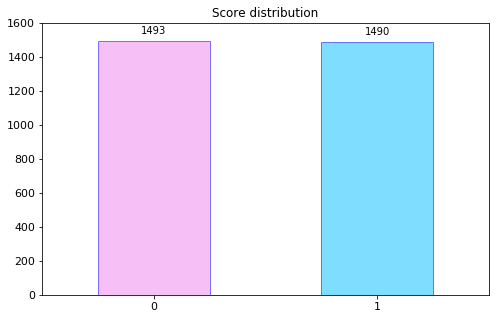

In [189]:
print(result.score.value_counts())

# plot barchart for result
import numpy as np
my_colors = 'violet','deepskyblue'
ax = result.score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, 1600],        
                                    rot = 0, fontsize = 11, figsize = (8,5),
                                    color = my_colors,
                                    alpha = 0.5,
                                    edgecolor = 'blue')
# annotate
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

0    511
1    489
Name: score, dtype: int64


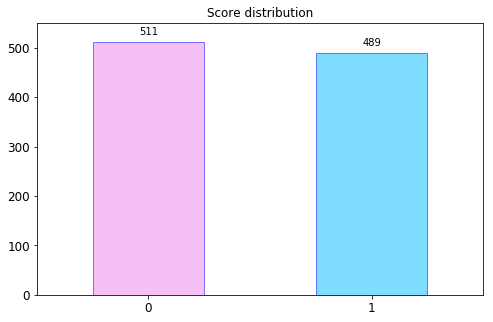

In [188]:
print(result_sample.score.value_counts())

# plot barchart for result_sample
my_colors = 'violet','deepskyblue'
ax = result_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'Score distribution',
                                           ylim = [0, 550], 
                                           rot = 0, fontsize = 12, figsize = (8,5),
                                           color = my_colors,
                                           alpha=0.5,
                                           edgecolor = 'blue')
# annotate
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

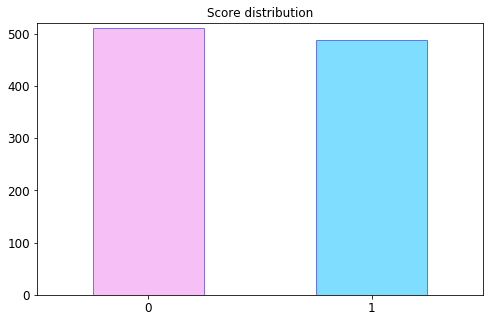

In [190]:
my_colors = 'violet','deepskyblue'
result_sample.score.value_counts().plot(kind = 'bar',
                                           title = 'Score distribution',
                                           ylim = [0,result_sample.score.value_counts().max()+10], 
                                           rot = 0, fontsize = 12, figsize = (8,5),
                                           color = my_colors,
                                           alpha=0.5,
                                           edgecolor = 'blue')

0    1493
1    1490
Name: score, dtype: int64
0    511
1    489
Name: score, dtype: int64


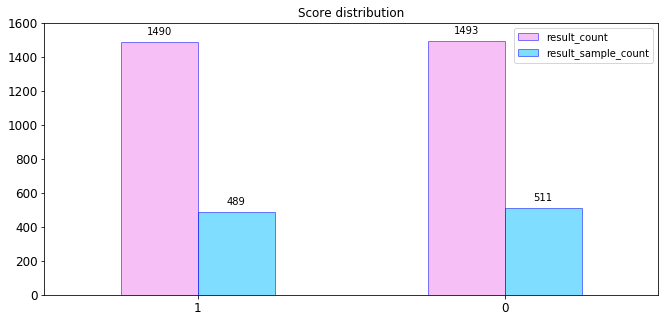

In [191]:
result_count = result.score.value_counts()
print(result_count)
result_sample_count = result_sample.score.value_counts()
print(result_sample_count)
index = [1, 0]
my_colors = 'violet','deepskyblue'
df = pd.DataFrame({'result_count': result_count,'result_sample_count': result_sample_count}, index = index)
ax = df.plot.bar(title = 'Score distribution',
                 ylim = [0, 1600],
                 rot = 0,
                 fontsize = 12,
                 figsize = (11,5),
                 color = my_colors,
                 alpha=0.5,
                 edgecolor = 'blue')
ax.legend(loc = 'upper right', frameon = True)
# annotate
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## 2. Feature Creation

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/LorkYee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
# takes a like a minute or two to process
result['unigrams'] = result['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [34]:
result[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [35]:
result[0:4]

,sentence,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."


In [36]:
list(result[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

## 3. Feature Subset Selection

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
result_counts = count_vect.fit_transform(result.sentence)

In [38]:
result_counts

<2983x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 31515 stored elements in Compressed Sparse Row format>

In [39]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(result[:1].sentence)))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [40]:
# We can check the shape of this matrix by:
result_counts.shape

(2983, 5155)

In [41]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [42]:
result[0:5]

,sentence,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,"[The, mic, is, great, .]"


In [43]:
# we convert from sparse array to normal array
result_counts[0:5,0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [44]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[55:80]]

In [45]:
plot_x

['term_70',
 'term_70000',
 'term_700w',
 'term_70s',
 'term_80',
 'term_80s',
 'term_8125',
 'term_85',
 'term_8525',
 'term_8530',
 'term_8pm',
 'term_90',
 'term_95',
 'term_99',
 'term_aailiyah',
 'term_abandoned',
 'term_abhor',
 'term_ability',
 'term_able',
 'term_abound',
 'term_about',
 'term_above',
 'term_abroad',
 'term_absolute',
 'term_absolutel']

In [46]:
# obtain document index
plot_y = ["sent_"+ str(i) for i in list(result.index)[55:80]]
plot_z = result_counts[55:80, 55:80].toarray()
# plot_y
# plot_z

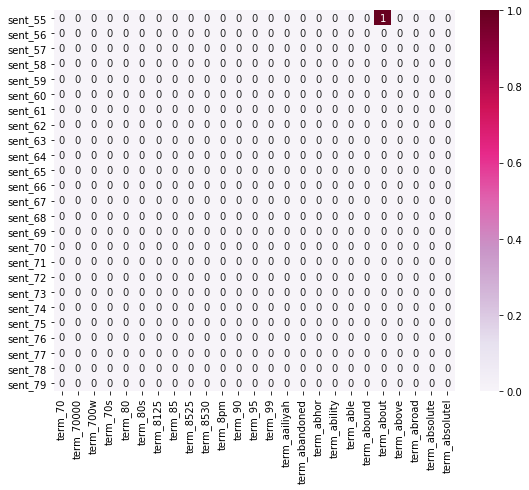

In [47]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

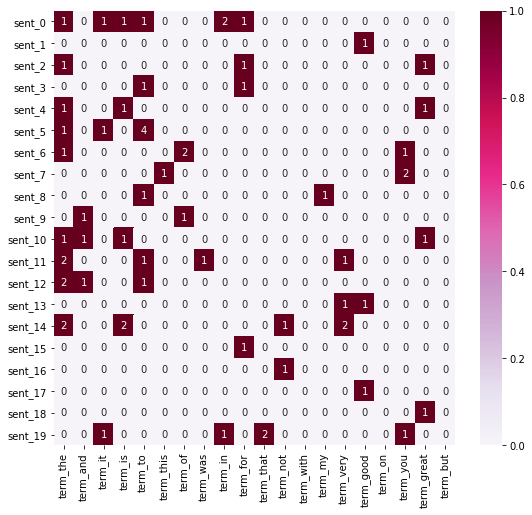

In [228]:
import seaborn as sns

# Mean the number of result_counts and sort them by getting only first 20 features
listsort = np.argsort(np.mean(result_counts, axis = 0).tolist()[0])[::-1][0:20]
docindex = slice(0,20)
plot_x = ["term_"+ str (count_vect.get_feature_names()[i]) for i in listsort]
plot_y = ["sent_"+ str(i) for i in list(result.index)[docindex]]
plot_z = result_counts[docindex, listsort].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize = (9, 8))
ax = sns.heatmap(df_todraw,
                 cmap = "PuRd",
                 vmin = 0, vmax = 1, annot = True)

## 4. Dimensionality Reduction

In [48]:
from sklearn.decomposition import PCA

In [49]:
result_reduced = PCA(n_components = 2).fit_transform(result_counts.toarray())
result_reduced.shape

(2983, 2)

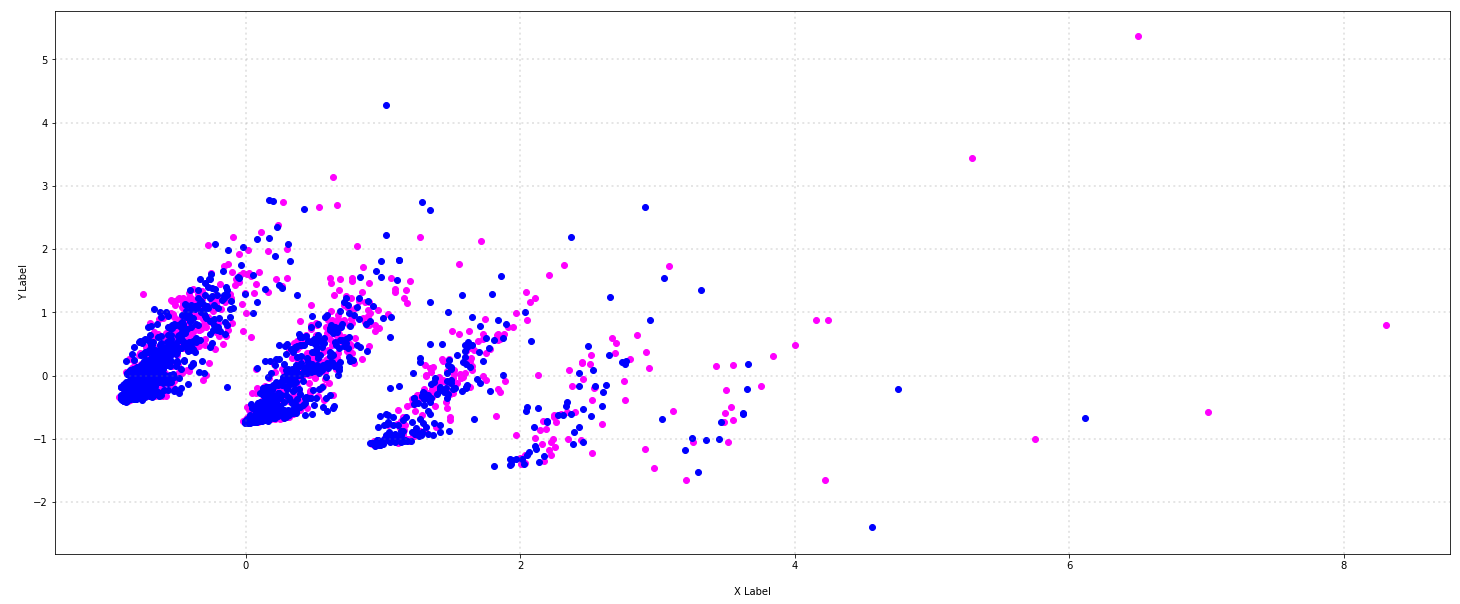

In [50]:
col = ['magenta', 'blue']
score = [1,0]
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, scores in zip(col, score):
    xs = result_reduced[result['score'] == scores].T[0]
    ys = result_reduced[result['score'] == scores].T[1]
   
    ax.scatter(xs, ys, c = c, marker = 'o')

ax.grid(color = 'gray', linestyle = ':', linewidth = 2, alpha = 0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

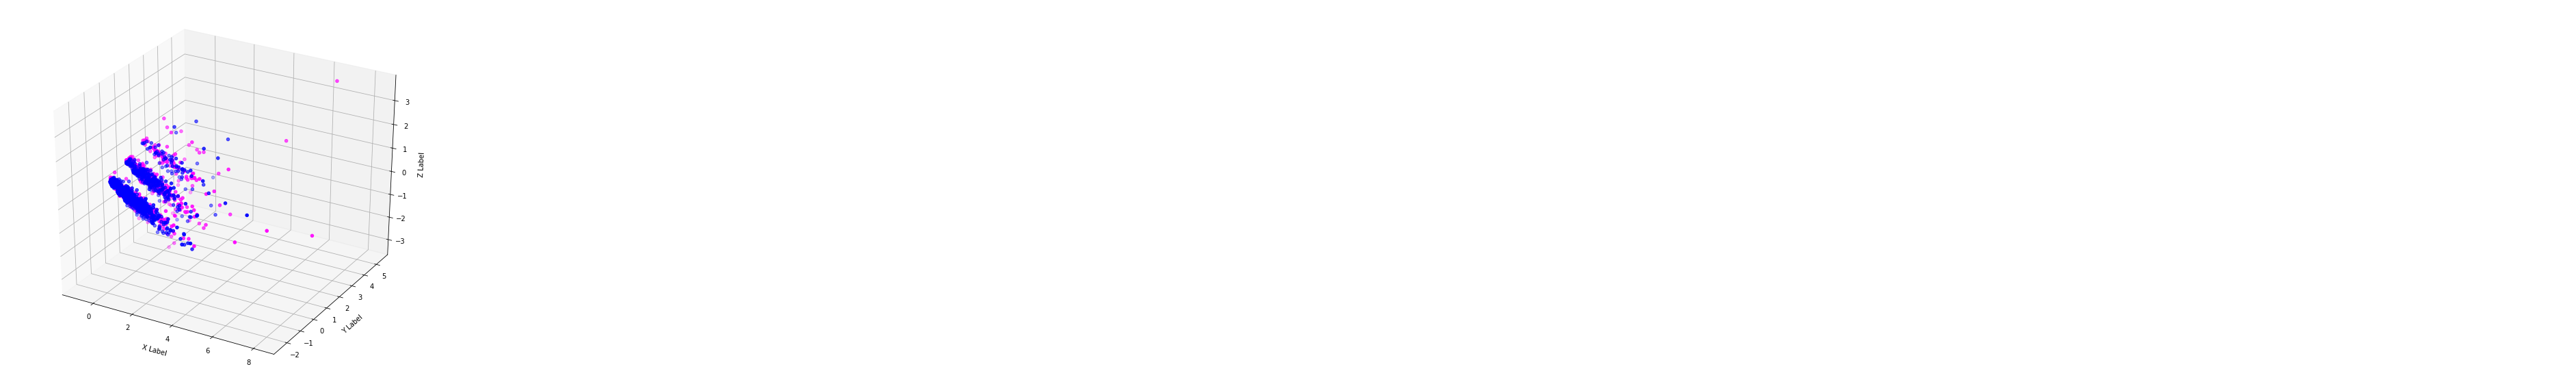

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['magenta', 'blue', 'cyan']

result_reduced_3 = PCA(n_components = 3).fit_transform(result_counts.toarray())

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(1,2,2, projection='3d')

for c, scores in zip(col, score):
    xs = result_reduced_3[result['score'] == scores].T[0]
    ys = result_reduced_3[result['score'] == scores].T[1]
    zs = result_reduced_3[result['score'] == scores].T[2]
    ax.scatter(xs, ys, zs, c = c, marker = 'o')

ax.grid(color = 'gray', linestyle = ':', linewidth = 2, alpha = 0.25)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

## 5. Attribute Transformation/Aggregation

In [52]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,result_counts.shape[1]):
    term_frequencies.append(sum(result_counts[:,j].toarray()))

In [53]:
term_frequencies = np.asarray(result_counts.sum(axis = 0))[0]
term_frequencies[0]

1

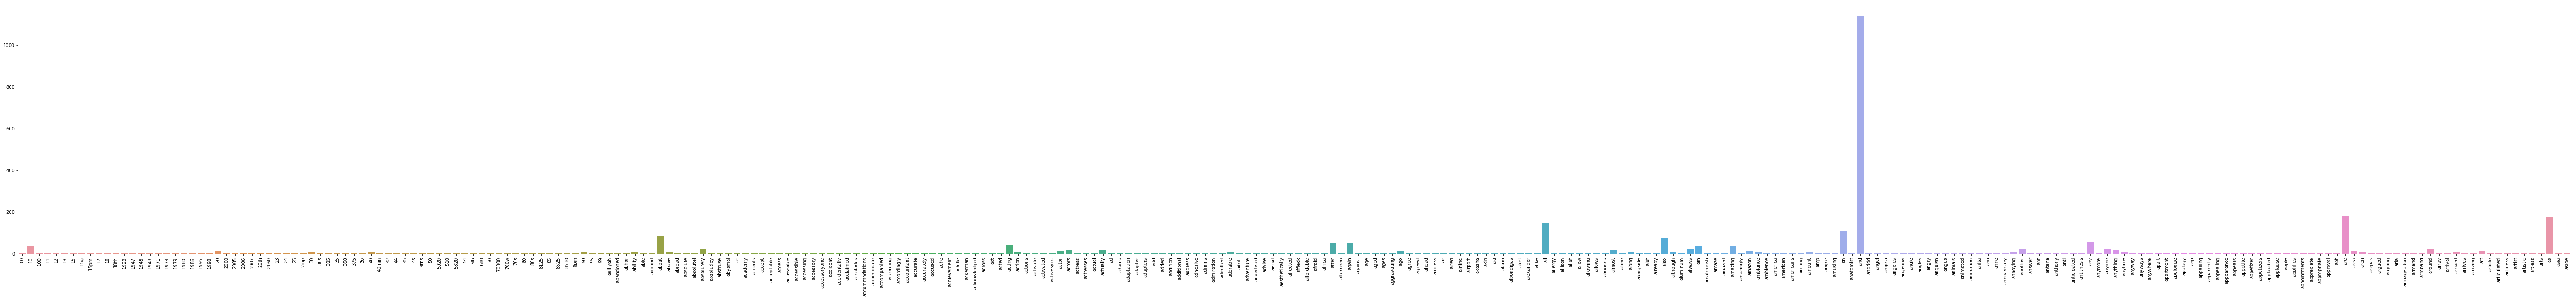

In [54]:
plt.subplots(figsize = (100, 10))
g = sns.barplot(x = count_vect.get_feature_names()[:300], 
            y = term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [55]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username = 'YvonneChow', api_key = '407JlWlXAzXhoaoJ1R9t')

# Plotly was implemented to make the plot become nicer interactive visualization
data = [go.Bar(x = count_vect.get_feature_names(), 
            y = term_frequencies,
            marker = dict(color = '#EB89B5'))]

py.iplot(data, filename = 'jupyter-bar-score')

In [56]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username = 'YvonneChow', api_key = '407JlWlXAzXhoaoJ1R9t')

# The number of terms were reduced become 200 for a better visualization
data = [go.Bar(x = count_vect.get_feature_names(), 
            y = term_frequencies[:200],
            marker = dict(color = '#EB89B5'))]

py.iplot(data, filename = 'jupyter-bar-reduce-score')

In [57]:
# Answer here
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username = 'YvonneChow', api_key = '407JlWlXAzXhoaoJ1R9t')

# The number of terms on x-axis were reduced become 200 and sorted by frequency instead of alphabetical order
bar = go.Bar(x = (count_vect.get_feature_names()), 
            y = sorted(term_frequencies[:200],reverse = True),
            marker = dict(color = '#EB89B5'))
line = go.Scatter(x = (count_vect.get_feature_names()), 
            y = sorted(term_frequencies[:200],reverse = True),
            marker = dict(color = 'magenta'))

data = [bar, line]
py.iplot(data, filename = 'jupyter-bar-longtail-score')

In [58]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

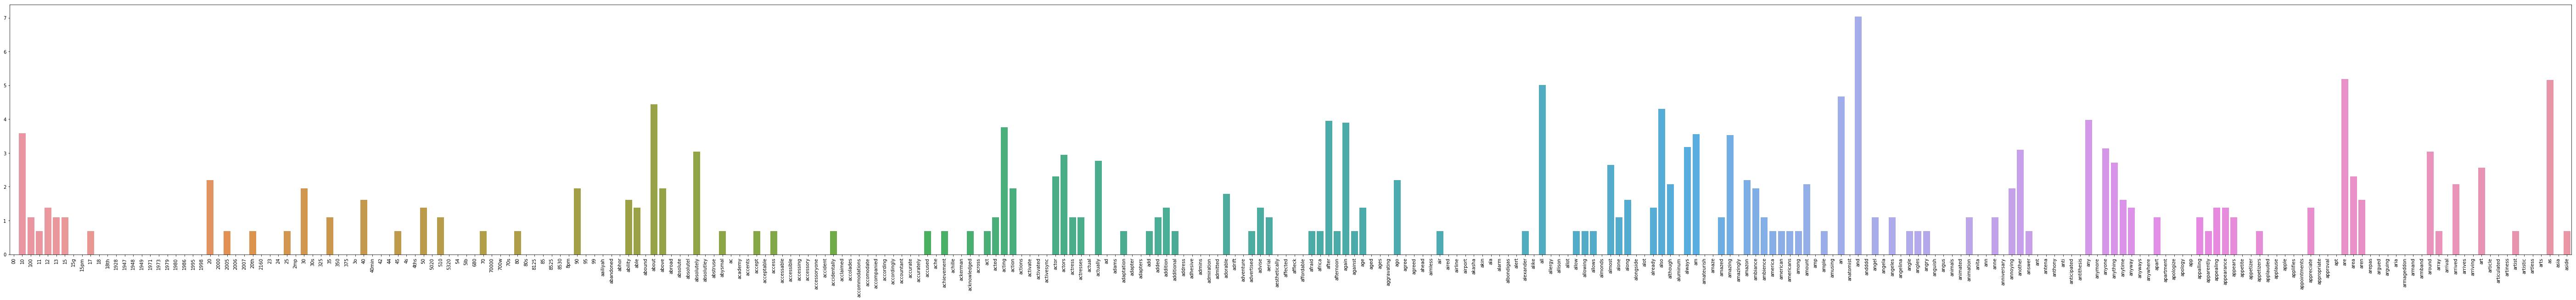

In [59]:
plt.subplots(figsize = (100, 10))
g = sns.barplot(x = count_vect.get_feature_names()[:300],
                y = term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

## 6. Discretization and Binarization

In [60]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [61]:
mlb = preprocessing.LabelBinarizer()

In [62]:
mlb.fit(result.score)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [63]:
mlb.classes_

array([0, 1])

In [64]:
result['bin_score'] = mlb.transform(result['score']).tolist()

In [65]:
result[0:9]

,sentence,score,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


# Generate new data visualizations

In [284]:
# Visualize by using Stacked Bar Chart, plotly
x = ["1 (Positive)","0 (Negative)"]
result_count = result.score.value_counts()
result_sample_count = result_sample.score.value_counts()

trace1 = go.Bar(
    x = x,
    y = result_sample_count,
    name = 'Sample Dataset Count',
    text = result_sample_count,
    textposition = 'auto',
    marker = dict(
        color = 'violet',
        line = dict(
            color = 'rgb(99, 10, 90)',
            width = 1),
        ),
    opacity = 0.6
)
trace2 = go.Bar(
    x = x,
    y = result_count,
    name = 'Whole Dataset Count',
    text = result_count,
    textposition = 'auto',
    marker = dict(
        color = 'deepskyblue',
        line = dict(
            color = 'rgb(58, 55, 198)',
            width = 1),
        ),
    opacity = 0.6
)

data = [trace1, trace2]
layout = go.Layout(
    barmode = 'stack'
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'jupyter-stacked-bar')

In [283]:
# Visualize by using Bar Chart, plotly
x = ["1 (Positive)","0 (Negative)"]
result_count = result.score.value_counts()
result_sample_count = result_sample.score.value_counts()

trace1 = go.Bar(
    x = x,
    y = result_count,
    name = 'Whole Dataset Count',
    text = result_count,
    textposition = 'auto',
    marker = dict(
        color = 'violet',
        line = dict(
            color = 'rgb(99, 10, 90)',
            width = 1),
        ),
    opacity = 0.6
)
trace2 = go.Bar(
    x = x,
    y = result_sample_count,
    name = 'Sample Dataset Count',
    text = result_sample_count,
    textposition = 'auto',
    marker = dict(
        color = 'deepskyblue',
        line = dict(
            color = 'rgb(58, 55, 198)',
            width = 1),
        ),
    opacity = 0.6
)

data = [trace1,trace2]
py.iplot(data, filename = 'jupyter-grouped-bar-direct-labels')

In [299]:
# Visualize by using Donut Pie Chart, plotly
label = ["1 (Positive)","0 (Negative)"]
color = ["rgb(182, 66, 244)","rgb(224, 53, 210)"]
result_count = result.score.value_counts()
result_sample_count = result_sample.score.value_counts()
fig = {
  "data": [
    {
      # Whole Dataset
      "values": result_count,
      "labels": label,
      "text": result_count,
      "textposition":"inside",
      "domain": {"x": [0, .48]},
      "name": "Whole Dataset count",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie",
      "marker": {"colors": color,
                "line": dict(color = 'rgb(252, 252, 252)', width = 1)}
    },
    {
      # Sample Dataset
      "values": result_sample_count,
      "labels": label,
      "text": result_sample_count,
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Sample Dataset Count",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie",
      "marker": {"colors": color,
                "line": dict(color = 'rgb(252, 252, 252)', width = 1)}
    }],
  "layout": {
        "title":"Total Count for Whole Dataset and Sample Dataset",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Wholeset",
                "x": 0.185,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Sampleset",
                "x": 0.82,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename = 'jupyter-donut')

# TF-IDF features from the tokens of each text

In [66]:
# Using TF-IDF to generate the matrix
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = result.sentence
vectorizer = TfidfVectorizer()
vec = vectorizer.fit_transform(corpus)

# Check the matrix
print(vectorizer.get_feature_names())

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973', '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005', '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30', '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44', '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb', '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85', '8525', '8530', '8pm', '90', '95', '99', 'aailiyah', 'abandoned', 'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad', 'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse', 'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable', 'access', 'accessable', 'accessible', 'accessing', 'accessory', 'accessoryone', 'accident', 'accidentally', 'acclaimed', 'accolades', 'accommodations', 'accomodate', 'accompanied', 'according', 'accordingly', 'accountant', 'accurate', 'accurately', 'accused', 'ache', 'achievement', 'achille', '

In [67]:
# We can check the shape of this matrix by:
print(vec.shape)

(2983, 5155)


In [68]:
# We can obtain the feature names of the vectorizer, i.e., the terms
vectorizer.get_feature_names()[:10]

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

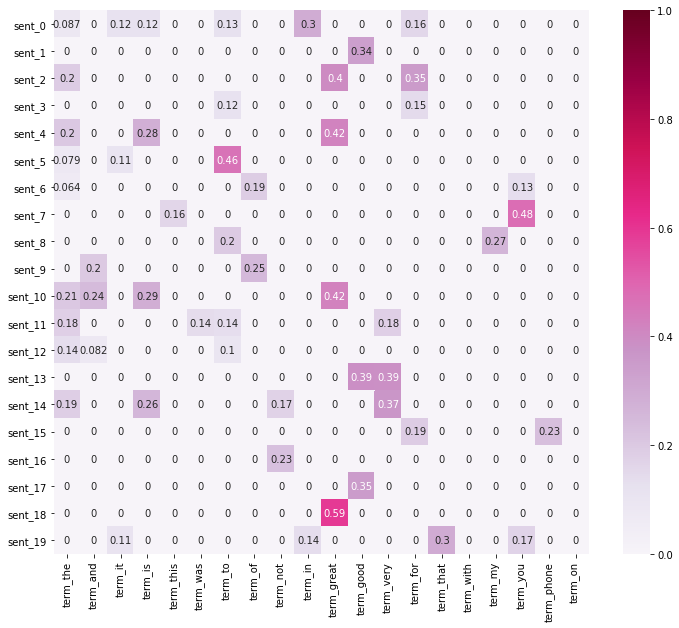

In [229]:
import seaborn as sns

# Mean the number of result_counts and sort them by getting only first 20 features
listsort = np.argsort(np.mean(vec, axis = 0).tolist()[0])[::-1][0:20]
docindex = slice(0,20)
plot_x = ["term_"+ str (vectorizer.get_feature_names()[i]) for i in listsort]
plot_y = ["sent_"+ str(i) for i in list(result.index)[docindex]]
plot_z = vec[docindex, listsort].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize = (12, 10))
ax = sns.heatmap(df_todraw,
                 cmap = "PuRd",
                 vmin = 0, vmax = 1, annot = True)

In [199]:
# Dimensionality Reduction for TF-IDF
result_reduced = PCA(n_components = 2).fit_transform(vec.toarray())
result_reduced.shape

(2983, 2)

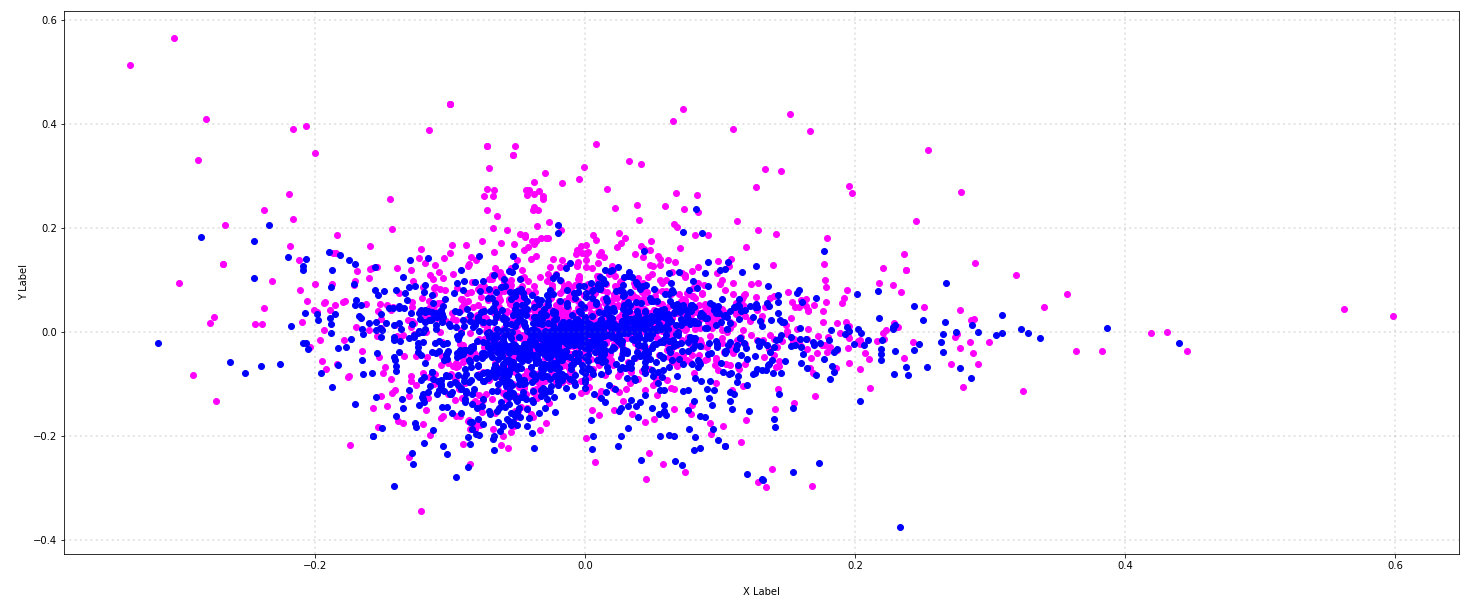

In [200]:
# TF-IDF, 2D
col = ['magenta', 'blue']
score = [1,0]
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, scores in zip(col, score):
    xs = result_reduced[result['score'] == scores].T[0]
    ys = result_reduced[result['score'] == scores].T[1]
   
    ax.scatter(xs, ys, c = c, marker = 'o')

ax.grid(color = 'gray', linestyle = ':', linewidth = 2, alpha = 0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

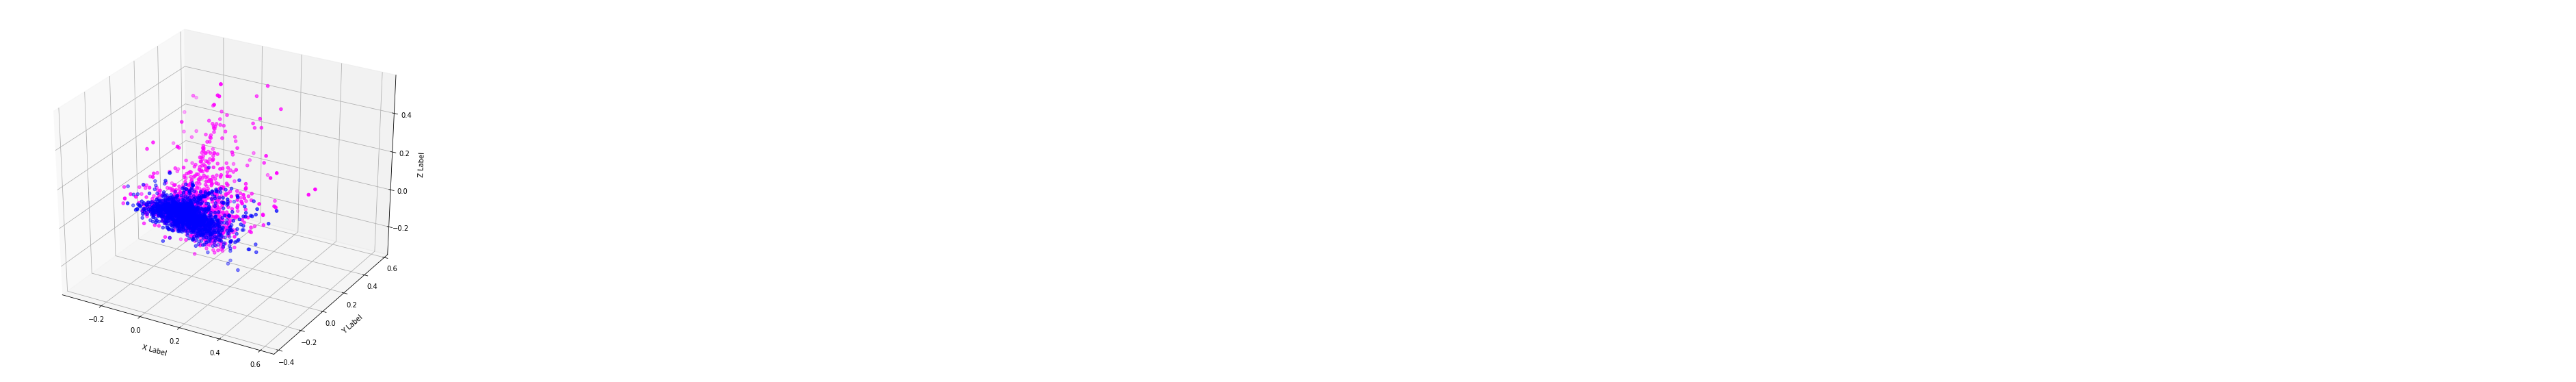

In [201]:
# TF-IDF, 3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

col = ['magenta', 'blue', 'cyan']

result_reduced_3 = PCA(n_components = 3).fit_transform(vec.toarray())

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(1,2,2, projection='3d')

for c, scores in zip(col, score):
    xs = result_reduced_3[result['score'] == scores].T[0]
    ys = result_reduced_3[result['score'] == scores].T[1]
    zs = result_reduced_3[result['score'] == scores].T[2]
    ax.scatter(xs, ys, zs, c = c, marker = 'o')

ax.grid(color = 'gray', linestyle = ':', linewidth = 2, alpha = 0.25)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

plt.show()

# Compute the similarity using TF-IDF and word frequency features
Compute the similarity between random sentences and report results. 

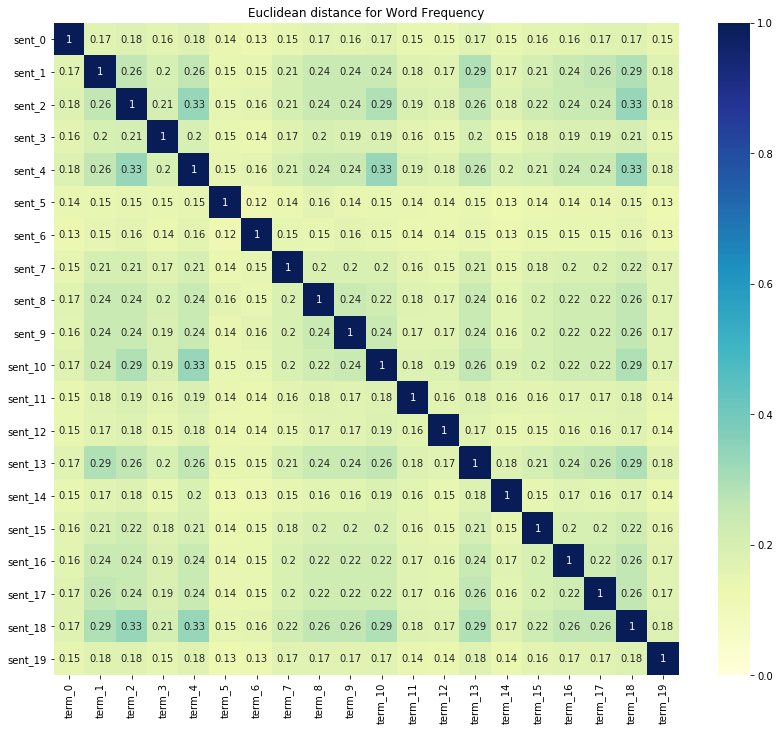

In [70]:
# Euclidean distance for Word Frequency
from sklearn.metrics.pairwise import euclidean_distances

euclidean_metrics = euclidean_distances(result_counts)
euclidean_metrics

# obtain document index
plot_x = ["term_"+ str(i) for i in range(20)]
plot_y = ["sent_"+ str(i) for i in range(20)]
plot_z = euclidean_distances(result_counts)[0:20, 0:20]
# convert distance into similarity by using, 1 / (1 + euclidean_distances)
plot_m = 1 / (1 + plot_z)

import seaborn as sns
df_todraw = pd.DataFrame(plot_m, columns = plot_x, index = plot_y)
plt.subplots(figsize = (14, 12))
plt.title('Euclidean distance for Word Frequency')
ax = sns.heatmap(df_todraw,
                cmap = "YlGnBu",
                vmin = 0, vmax = 1, annot = True)

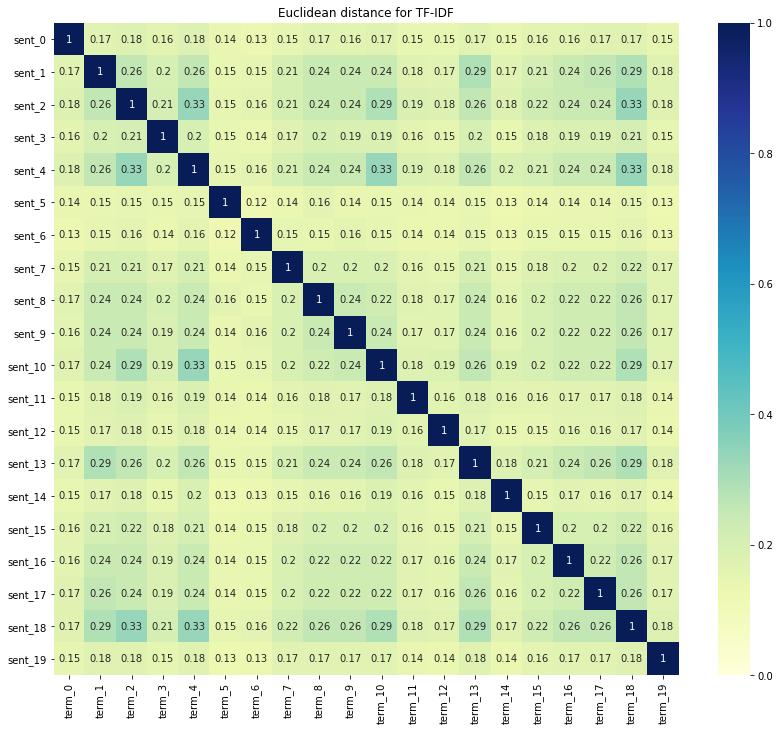

In [71]:
# Euclidean distance for TF-IDF
from sklearn.metrics.pairwise import euclidean_distances

euclidean_metrics = euclidean_distances(vec)
euclidean_metrics

# obtain document index
plot_x = ["term_"+ str(i) for i in range(20)]
plot_y = ["sent_"+ str(i) for i in range(20)]
plot_z = euclidean_distances(result_counts)[0:20, 0:20]
# convert distance into similarity by using, 1 / (1 + euclidean_distances)
plot_m = 1 / (1 + plot_z)

import seaborn as sns
df_todraw = pd.DataFrame(plot_m, columns = plot_x, index = plot_y)
plt.subplots(figsize = (14, 12))
plt.title('Euclidean distance for TF-IDF')
ax = sns.heatmap(df_todraw,
                cmap = "YlGnBu",
                vmin = 0, vmax = 1, annot = True)

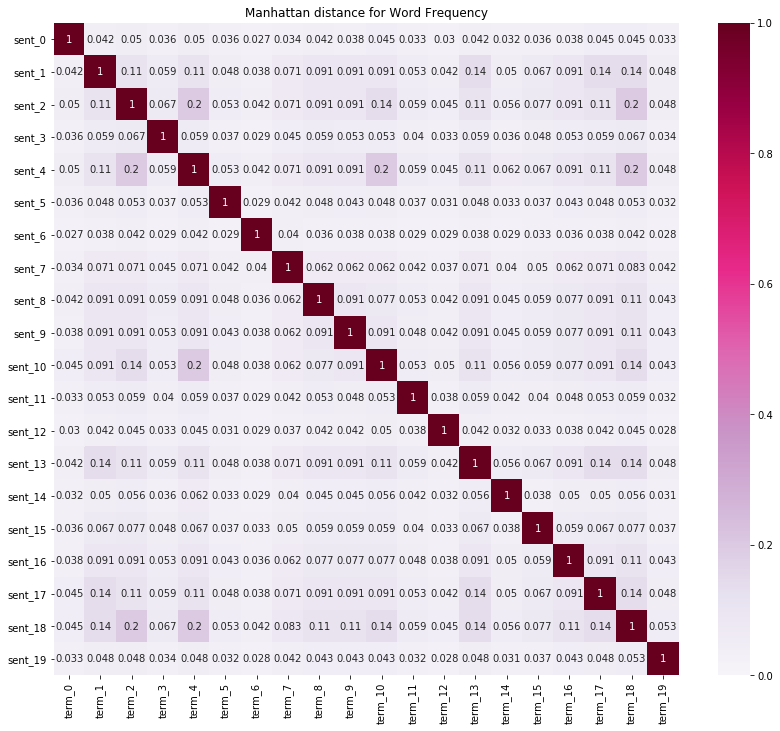

In [72]:
# Manhattan distance for Word Frequency
from sklearn.metrics.pairwise import manhattan_distances

manhattan_metrics = manhattan_distances(result_counts)
manhattan_metrics

# obtain document index
plot_x = ["term_"+ str(i) for i in range(20)]
plot_y = ["sent_"+ str(i) for i in range(20)]
plot_z = manhattan_distances(result_counts)[0:20, 0:20]
# convert distance into similarity by using, 1 / (1 + manhattan_distances)
plot_m = 1 / (1 + plot_z)

import seaborn as sns
df_todraw = pd.DataFrame(plot_m, columns = plot_x, index = plot_y)
plt.subplots(figsize = (14, 12))
plt.title('Manhattan distance for Word Frequency')
ax = sns.heatmap(df_todraw,
                cmap = "PuRd",
                vmin = 0, vmax = 1, annot = True)

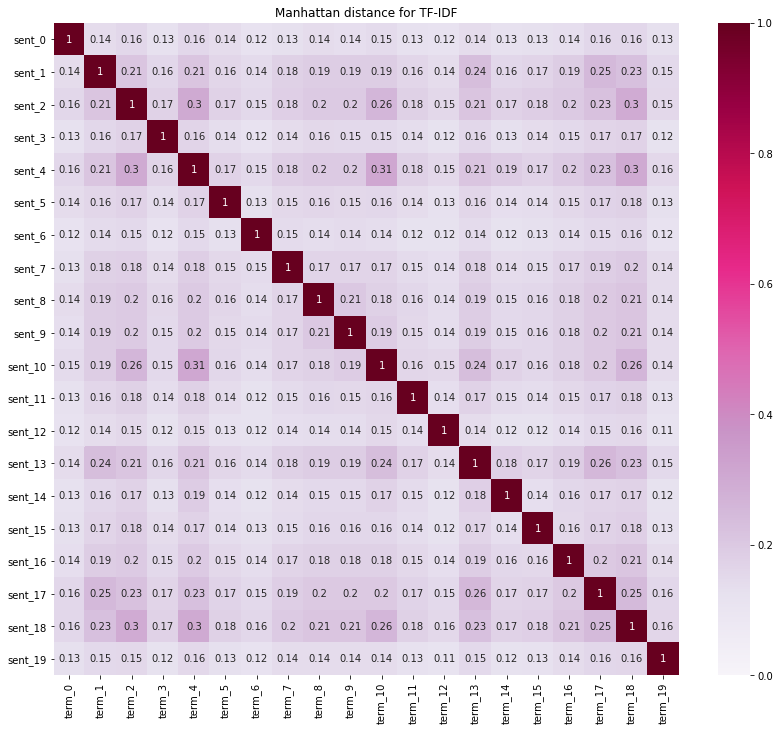

In [73]:
# Manhattan distance for TF-IDF
from sklearn.metrics.pairwise import manhattan_distances

manhattan_metrics = manhattan_distances(vec)
manhattan_metrics

# obtain document index
plot_x = ["term_"+ str(i) for i in range(20)]
plot_y = ["sent_"+ str(i) for i in range(20)]
plot_z = manhattan_distances(vec)[0:20, 0:20]
# convert distance into similarity by using, 1 / (1 + manhattan_distances)
plot_m = 1 / (1 + plot_z)

import seaborn as sns
df_todraw = pd.DataFrame(plot_m, columns = plot_x, index = plot_y)
plt.subplots(figsize = (14, 12))
plt.title('Manhattan distance for TF-IDF')
ax = sns.heatmap(df_todraw,
                cmap = "PuRd",
                vmin = 0, vmax = 1, annot = True)

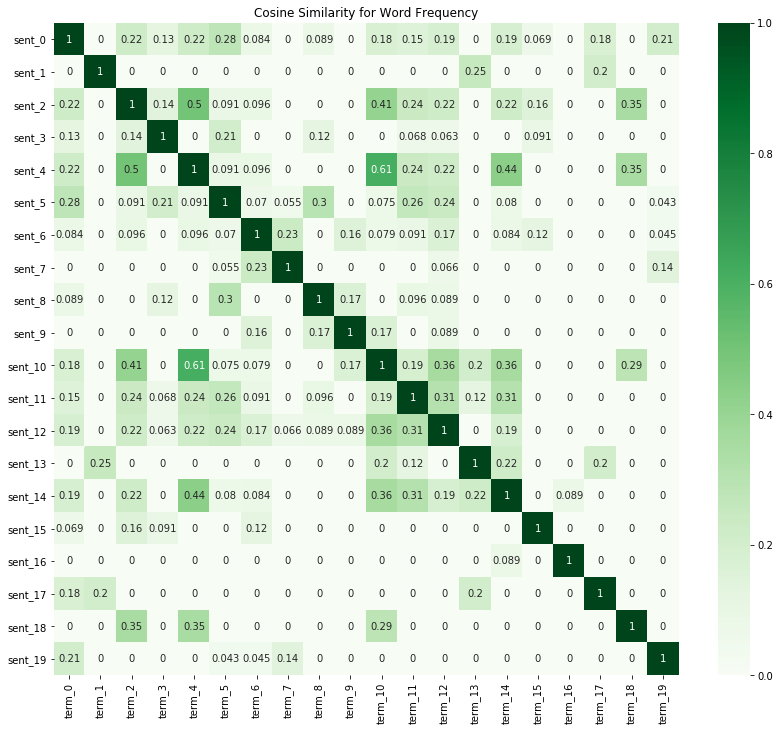

In [74]:
# Cosine similarity for Word Frequency
from sklearn.metrics.pairwise import cosine_similarity

cosine_metrics = cosine_similarity(result_counts)
cosine_metrics

# obtain document index
plot_x = ["term_"+ str(i) for i in range(20)]
plot_y = ["sent_"+ str(i) for i in range(20)]
plot_z = cosine_similarity(result_counts)[0:20, 0:20]

import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize = (14, 12))
plt.title('Cosine Similarity for Word Frequency')
ax = sns.heatmap(df_todraw,
                 cmap = "Greens",
                 vmin = 0, vmax = 1, annot = True)

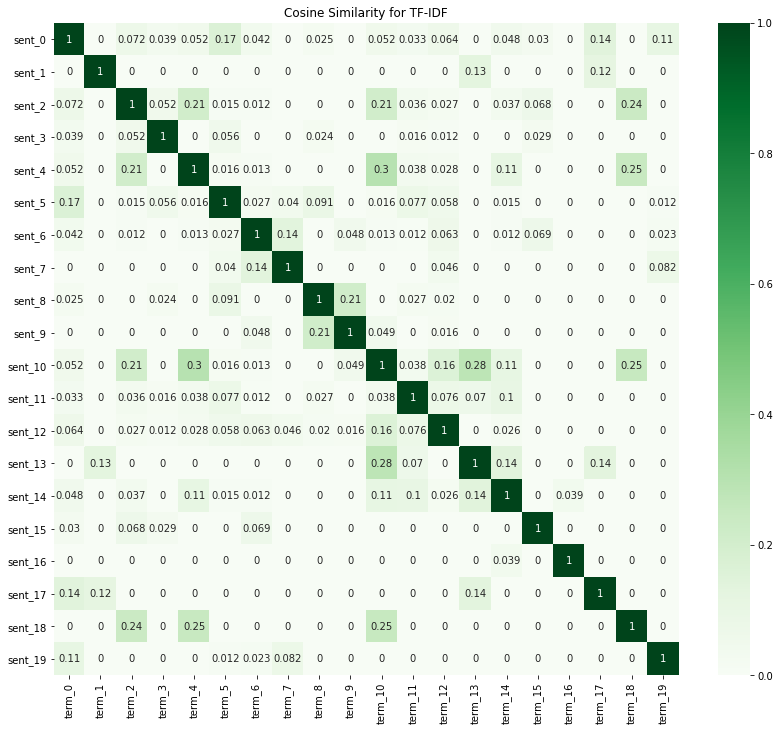

In [75]:
# Cosine similarity for TF-IDF
from sklearn.metrics.pairwise import cosine_similarity

cosine_metrics = cosine_similarity(vec)
cosine_metrics

# obtain document index
plot_x = ["term_"+ str(i) for i in range(20)]
plot_y = ["sent_"+ str(i) for i in range(20)]
plot_z = cosine_similarity(vec)[0:20, 0:20]

import seaborn as sns
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize = (14, 12))
plt.title('Cosine Similarity for TF-IDF')
ax = sns.heatmap(df_todraw,
                 cmap = "Greens",
                 vmin = 0, vmax = 1, annot = True)

# Naive Bayes classifier 
Automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this nice article on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.

In [165]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [194]:
# BernoulliNB, Word Frequency
# split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
X = result_counts.toarray()
Y = result['score'].values
bnb = BernoulliNB(binarize = 0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)
acc = cross_val_score(bnb, X, Y, scoring = 'accuracy', cv = 10).mean()
print('Accuracy for BernoulliNB (Word Frequency): {:.3f}'.format(acc))

Accuracy for BernoulliNB (Word Frequency): 0.820


In [193]:
# BernoulliNB, TF-IDF
# split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
X = vec.toarray()
Y = result['score'].values
bnb = BernoulliNB(binarize = 0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)
acc = cross_val_score(bnb, X, Y, scoring = 'accuracy', cv = 10).mean()
print('Accuracy for BernoulliNB (TF-IDF): {:.3f}'.format(acc))

Accuracy for BernoulliNB (TF-IDF): 0.820


In [196]:
# MultinomialNB, Word Frequency
# split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
X = result_counts.toarray()
Y = result['score'].values
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb.score(X_test, Y_test)
acc = cross_val_score(mnb, X, Y, scoring = 'accuracy', cv = 10).mean()
print('Accuracy for MultinomialNB (Word Frequency): {:.3f}'.format(acc))

Accuracy for MultinomialNB (Word Frequency): 0.819


In [195]:
# MultinomialNB, TF-IDF
# split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
X = vec.toarray()
Y = result['score'].values
mnb = MultinomialNB()
mnb.fit(X_train, Y_train)
mnb.score(X_test, Y_test)
acc = cross_val_score(mnb, X, Y, scoring = 'accuracy', cv = 10).mean()
print('Accuracy for MultinomialNB (TF-IDF): {:.3f}'.format(acc))

Accuracy for MultinomialNB (TF-IDF): 0.817


In [198]:
# GaussianNB, Word Frequency
# split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
X = result_counts.toarray()
Y = result['score'].values
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb.score(X_test, Y_test)
acc = cross_val_score(gnb, X, Y, scoring = 'accuracy', cv = 10).mean()
print('Accuracy for GaussianNB (Word Frequency): {:.3f}'.format(acc))

Accuracy for GaussianNB (Word Frequency): 0.667


In [197]:
# GaussianNB, TF-IDF
# split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)
X = vec.toarray()
Y = result['score'].values
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb.score(X_test, Y_test)
acc = cross_val_score(gnb, X, Y, scoring = 'accuracy', cv = 10).mean()
print('Accuracy for GaussianNB (TF-IDF): {:.3f}'.format(acc))

Accuracy for GaussianNB (TF-IDF): 0.669
